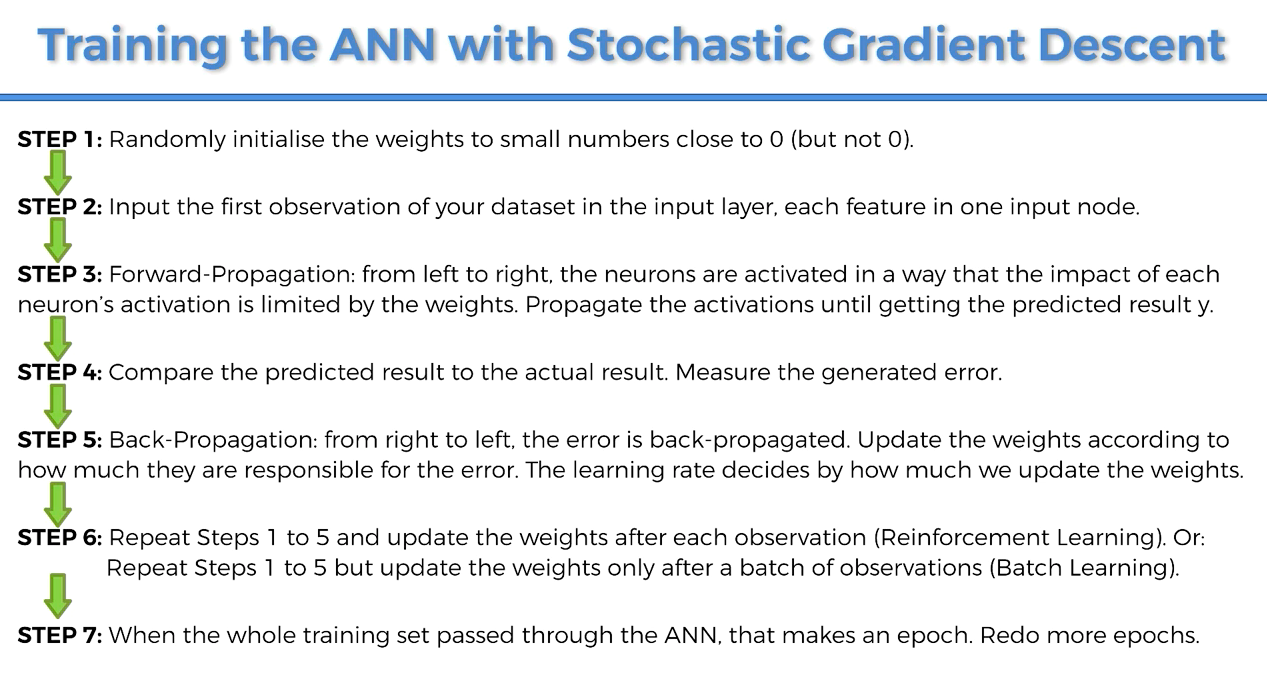

### Problem: Build a Neural network to predict the Customer Churn of a bank either they'll leave the bank or not using the hitorical data of previous customers

In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install theano

     |████████████████████████████████| 2.8 MB 960 kB/s eta 0:00:01
  Created wheel for theano: filename=Theano-1.0.5-py3-none-any.whl size=2668094 sha256=c582fa0fb93fa78f0184d73c5b85129260657801d1c66266670ba6e25bfb0c00
  Stored in directory: /Users/apple/Library/Caches/pip/wheels/26/68/6f/745330367ce7822fe0cd863712858151f5723a0a5e322cc144
Successfully built theano
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

# Data Preprocessing

In [2]:
#Import Dataset
dataset = pd.read_csv("Churn_Modelling.csv")
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [6]:
# Seperating Dependent Variables (X) and Independent Variable (y)
X = dataset.iloc[:,3:13].values
y = dataset.iloc[:,13].values

In [14]:
# Covert Gender and Geography from categorical variable to numbers

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le_2 = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])#Gender
le_1 = LabelEncoder()
X[:, 1] = le.fit_transform(X[:, 1])#Geography

# Categorical Variables Geography are not ordinal so we need to convert them into array

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Splitting the dataset in train and test dataset

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


# Build Artificial Neural Network
    

In [23]:
import keras

In [26]:
from keras.models import Sequential
from keras.layers import Dense

In [35]:
# Initialise ANN
classifier = tf.keras.models.Sequential()

In [37]:
# Add the input Layer and first hidden layer

#How to check the number of nodes in hidden layer = [(Number of nodes in input)+(Number of nodes in Output layer)]/2
# (11+1)/2 = 6



# Second Hidden layer
classifier.add(tf.keras.layers.Dense(units=6, activation='relu'))



# Input layer & first hidden layer

In [41]:
classifier.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Second hidden layer

In [42]:
classifier.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Third Hidden Layer

In [44]:
classifier.add(tf.keras.layers.Dense(units=6, activation='relu'))

# Adding the output layer

In [47]:
classifier.add(tf.keras.layers.Dense(units = 1, activation ='sigmoid'))

# Compile Artificial Neural Network

In [48]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the ANN

In [51]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
800/800 [==============================] - 2s 2ms/step - loss: 0.3362 - accuracy: 0.8596
Epoch 2/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3350 - accuracy: 0.8639
Epoch 3/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3335 - accuracy: 0.8648
Epoch 4/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3325 - accuracy: 0.8649
Epoch 5/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3342 - accuracy: 0.8621
Epoch 6/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3334 - accuracy: 0.8640
Epoch 7/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3343 - accuracy: 0.8622
Epoch 8/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3351 - accuracy: 0.8615
Epoch 9/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3341 - accuracy: 0.8634
Epoch 10/100
800/800 [==============================] - 1s 2ms/step - loss: 0.3335 - accura

# Prediciting the test set results

In [52]:
y_pred = classifier.predict(X_test)

# Confusion matrix

In [56]:
y_pred = y_pred>0.5

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [58]:
cm

array([[1510,   85],
       [ 200,  205]])

In [65]:
accuracy = ((1510+205)/2000)*100
accuracy

85.75